In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('credit_scoring.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get dataset summary
print(df.info())
print(df.describe())

   Age  Gender Marital Status Education Level Employment Status  \
0   60    Male        Married          Master          Employed   
1   25    Male        Married     High School        Unemployed   
2   30  Female         Single          Master          Employed   
3   58  Female        Married             PhD        Unemployed   
4   32    Male        Married        Bachelor     Self-Employed   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  
0      4675000           2.65         48  Personal Loan  
1      3619000           5.19 

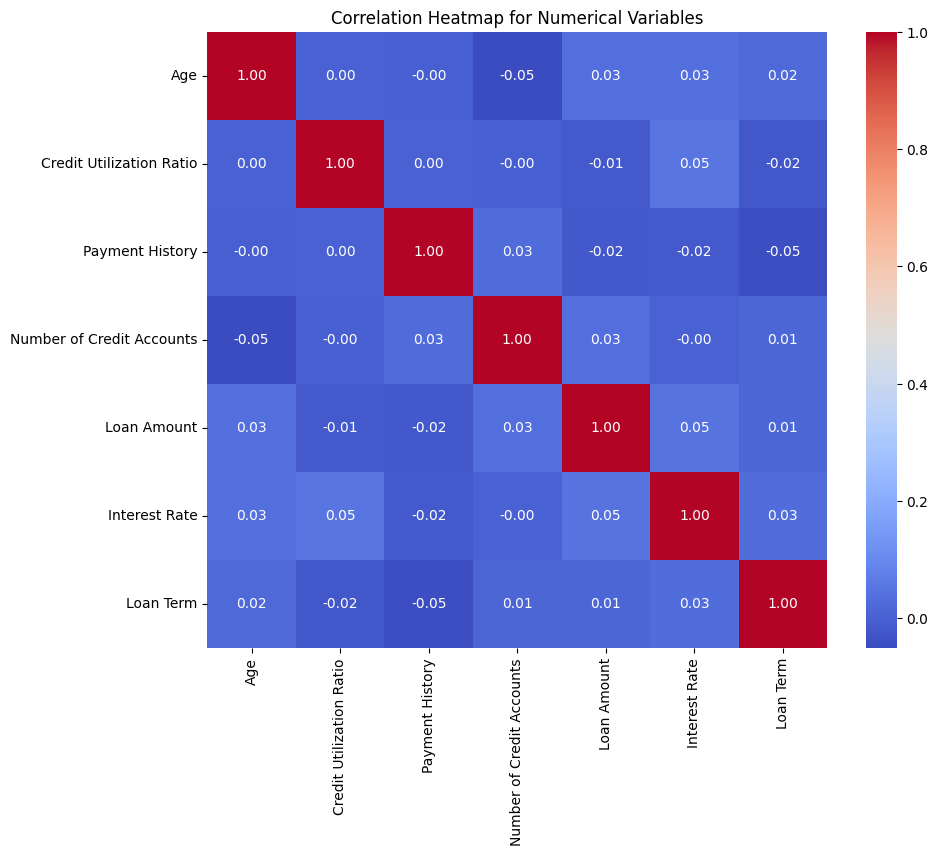

In [3]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('credit_scoring.csv')

# Display the first few rows
print(df.head())

# Define a function to categorize Employment Status
def categorize_employment_status(status):
    """
    Categorize Employment Status into numerical values:
    - Employed: 2
    - Self-Employed: 1
    - Unemployed: 0
    """
    if status == 'Employed':
        return 2
    elif status == 'Self-Employed':
        return 1
    elif status == 'Unemployed':
        return 0
    else:
        return 0  # Default to Unemployed if unknown

# Define a function to calculate FICO score for each row
def calculate_fico_score(row):
    """
    Calculate a proxy FICO score based on the given formula and clip it to the range [300, 850].
    """
    # Categorize Employment Status
    employment_status = categorize_employment_status(row['Employment Status'])

    # Define utilization rate and weight
    utilization_rate = row['Credit Utilization Ratio'] / 100
    utilization_weight = 30

    # Calculate components with new weights
    payment_history = row['Payment History'] - 35
    credit_utilization = (1 - utilization_rate) * utilization_weight
    number_of_credit_accounts = row['Number of Credit Accounts'] - 15
    loan_amount_weight = -10
    employment_status_weight = employment_status - 10

    # Combine components to calculate FICO score
    fico_score = (
        payment_history +
        credit_utilization +
        number_of_credit_accounts +
        loan_amount_weight +
        employment_status_weight
    )

    # Scale FICO score to the range [300, 850]
    fico_score = (fico_score / 100) * 550 + 300  # Scale to 300-850 range
    fico_score = np.clip(fico_score, 300, 850)  # Clip to ensure valid range

    return fico_score

# Apply the function to calculate FICO score for each row
df['FICO_Score'] = df.apply(calculate_fico_score, axis=1)

# Display the updated DataFrame with the new FICO_Score column
print(df.head())

# Save the updated DataFrame with the FICO_Score column to a new CSV file
df.to_csv('creditscoring_dataset_with_FICO.csv', index=False)

print("FICO scores calculated and saved to 'creditscoring_dataset_with_FICO.csv'.")

   Age  Gender Marital Status Education Level Employment Status  \
0   60    Male        Married          Master          Employed   
1   25    Male        Married     High School        Unemployed   
2   30  Female         Single          Master          Employed   
3   58  Female        Married             PhD        Unemployed   
4   32    Male        Married        Bachelor     Self-Employed   

   Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                      0.22           2685.0                          2   
1                      0.20           2371.0                          9   
2                      0.22           2771.0                          6   
3                      0.12           1371.0                          2   
4                      0.99            828.0                          2   

   Loan Amount  Interest Rate  Loan Term   Type of Loan  
0      4675000           2.65         48  Personal Loan  
1      3619000           5.19 

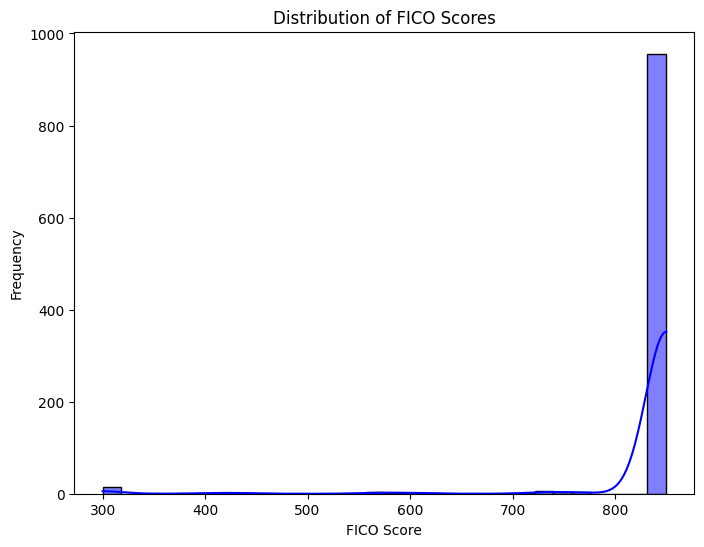

In [12]:
# Plot FICO score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['FICO_Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-13-d1def432671b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_type_counts.index, y=loan_type_counts.values, palette='viridis')


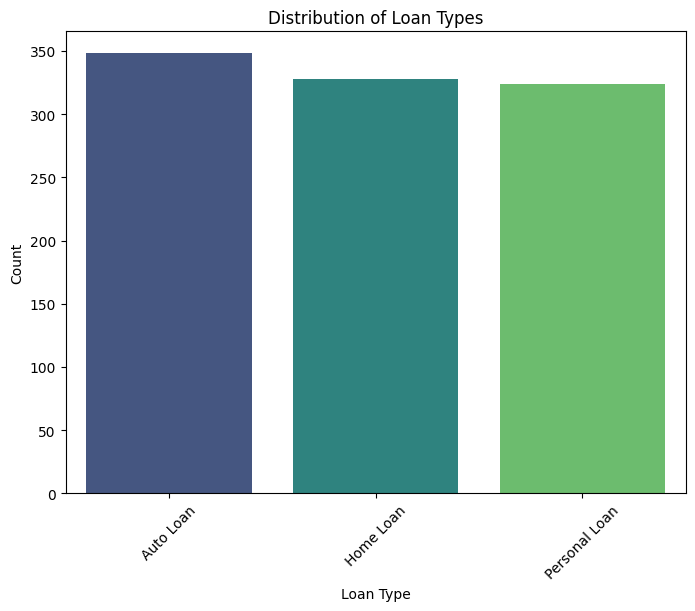

<ipython-input-13-d1def432671b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of Loan', y='FICO_Score', data=df, palette='coolwarm')


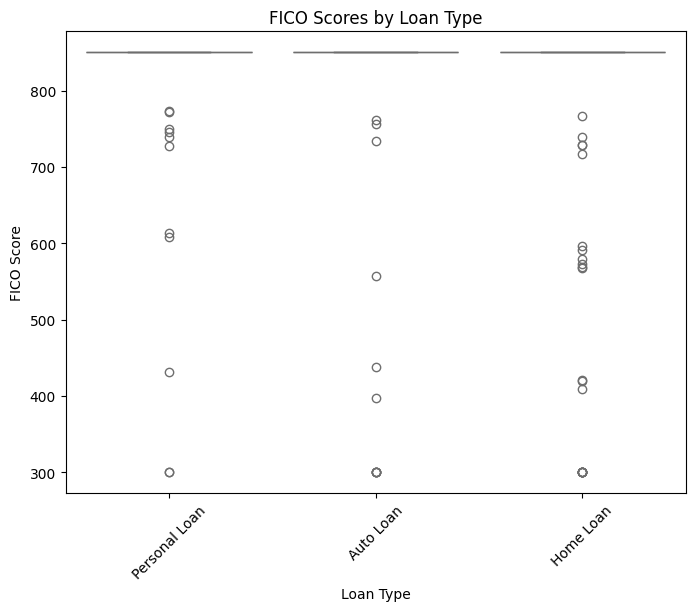

In [13]:
# Count of each loan type
loan_type_counts = df['Type of Loan'].value_counts()

# Plot loan type distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_type_counts.index, y=loan_type_counts.values, palette='viridis')
plt.title('Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Compare FICO scores across loan types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type of Loan', y='FICO_Score', data=df, palette='coolwarm')
plt.title('FICO Scores by Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('FICO Score')
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-f80a6692e50b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Credit Utilization Ratio', data=df, palette='pastel')


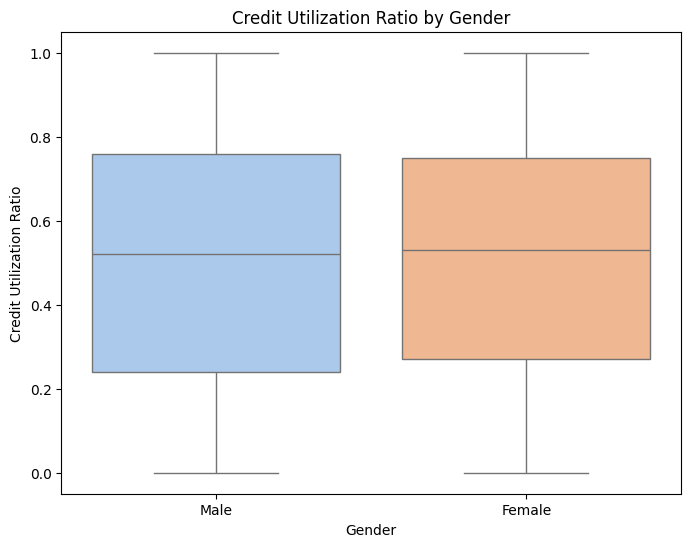

<ipython-input-14-f80a6692e50b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='Credit Utilization Ratio', data=df, palette='Set2')


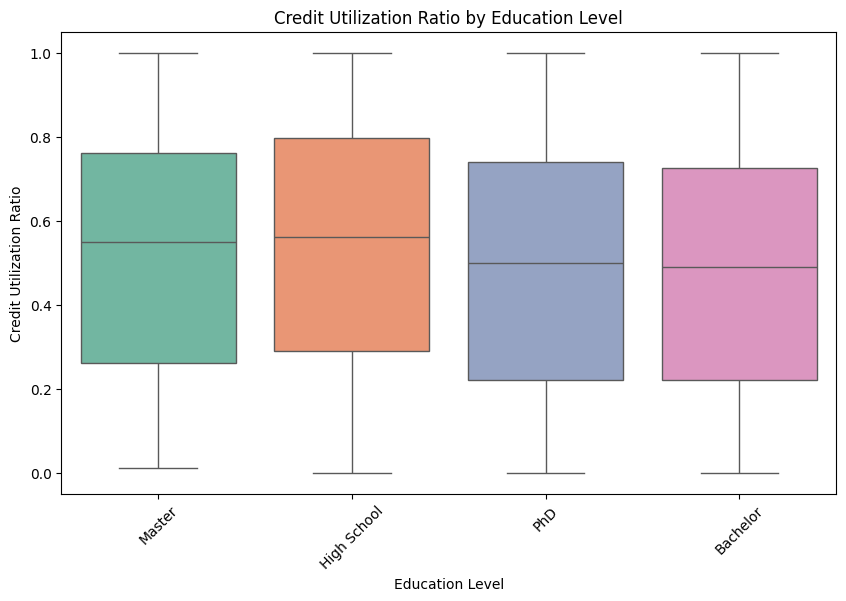

In [14]:
# Credit utilization by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Credit Utilization Ratio', data=df, palette='pastel')
plt.title('Credit Utilization Ratio by Gender')
plt.xlabel('Gender')
plt.ylabel('Credit Utilization Ratio')
plt.show()

# Credit utilization by education level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Credit Utilization Ratio', data=df, palette='Set2')
plt.title('Credit Utilization Ratio by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit Utilization Ratio')
plt.xticks(rotation=45)
plt.show()

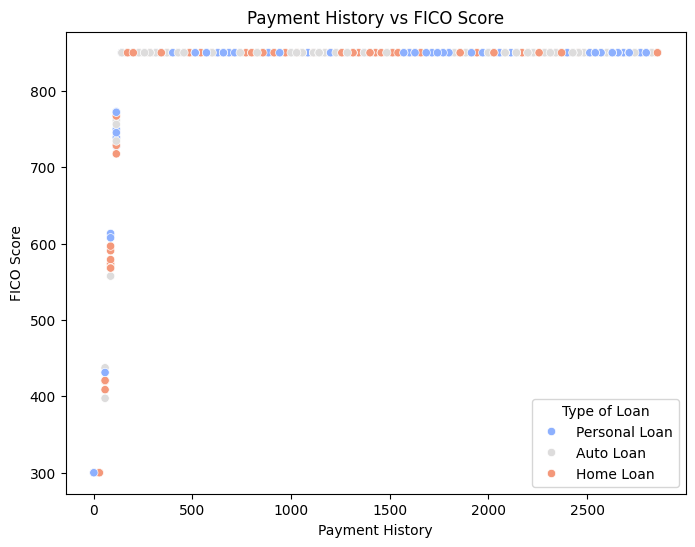

In [15]:
# Payment history vs FICO score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Payment History', y='FICO_Score', data=df, hue='Type of Loan', palette='coolwarm')
plt.title('Payment History vs FICO Score')
plt.xlabel('Payment History')
plt.ylabel('FICO Score')
plt.show()

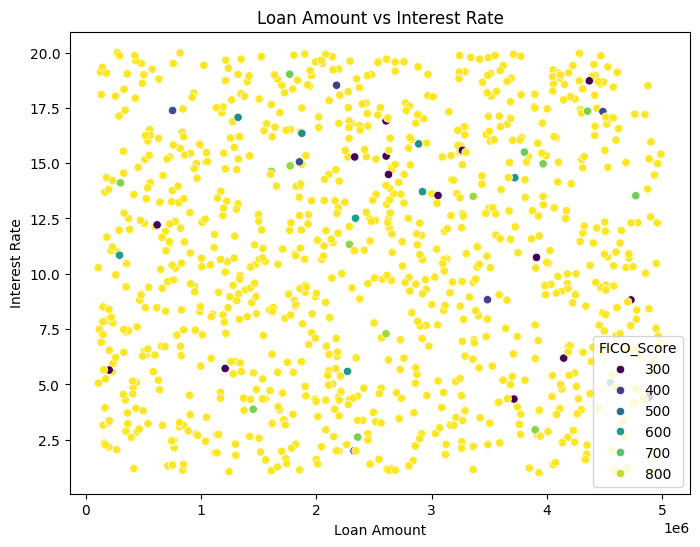

In [16]:
# Loan amount vs interest rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Loan Amount', y='Interest Rate', data=df, hue='FICO_Score', palette='viridis')
plt.title('Loan Amount vs Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

<ipython-input-18-e27ba6ce2127>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Employment Status', y='FICO_Score', data=fico_scores_by_employment, palette='Set2')


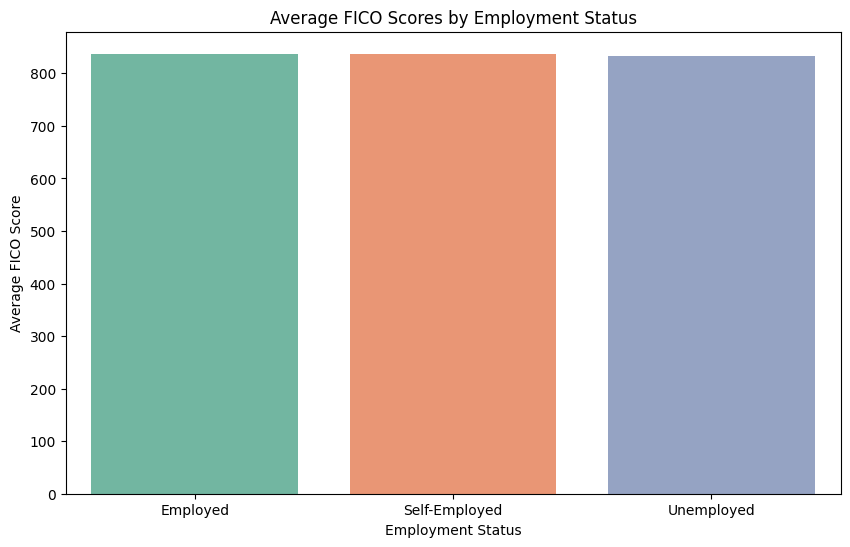

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing 'Employment Status' and 'FICO_Score' columns

# Group data by Employment Status and calculate the mean FICO score for each group
fico_scores_by_employment = df.groupby('Employment Status')['FICO_Score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Employment Status', y='FICO_Score', data=fico_scores_by_employment, palette='Set2')
plt.title('Average FICO Scores by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Average FICO Score')
plt.show()

<ipython-input-19-14e7cb7276e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='FICO_Score', data=df, palette='coolwarm')


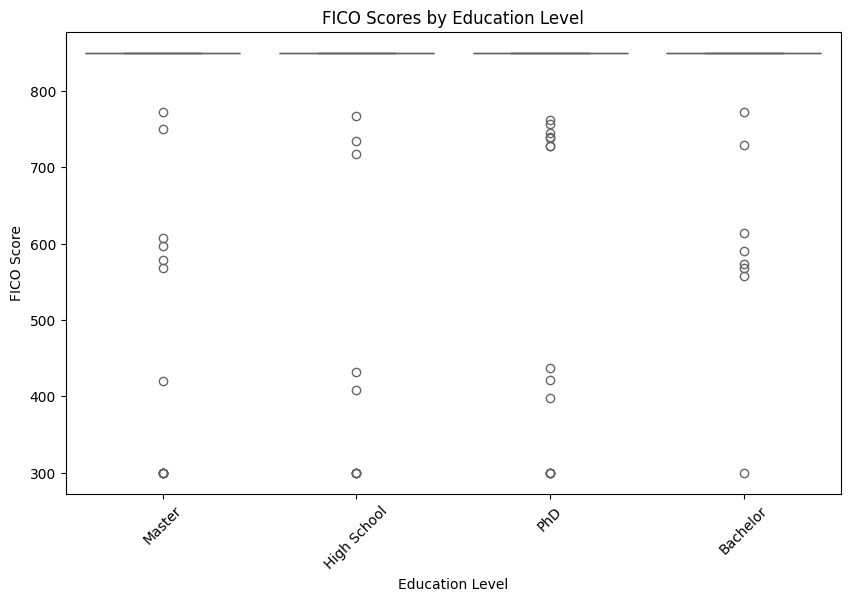

In [19]:
# Plot FICO scores by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='FICO_Score', data=df, palette='coolwarm')
plt.title('FICO Scores by Education Level')
plt.xlabel('Education Level')
plt.ylabel('FICO Score')
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-4f68b1c13790>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education Level', y='FICO_Score', data=fico_scores_by_education, palette='coolwarm')


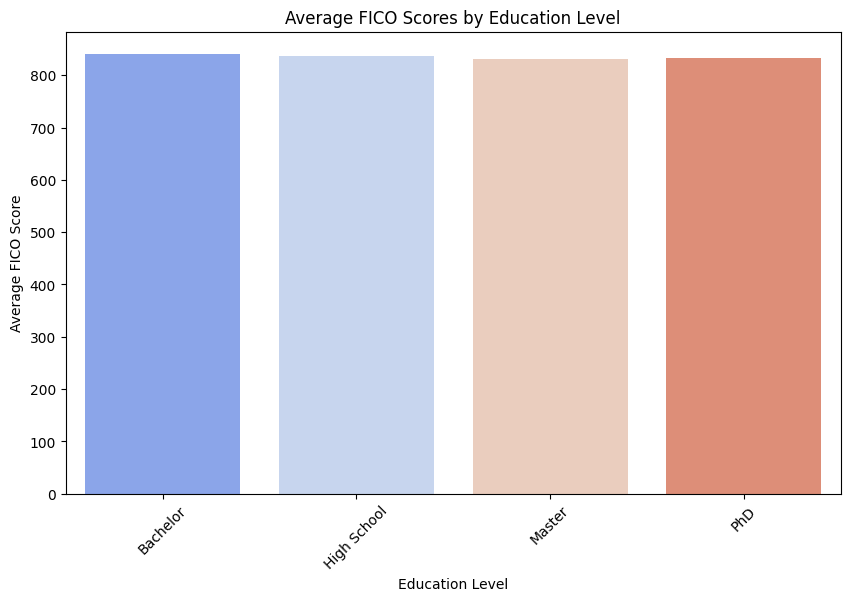

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing 'Education Level' and 'FICO_Score' columns

# Group data by Education Level and calculate the mean FICO score for each group
fico_scores_by_education = df.groupby('Education Level')['FICO_Score'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='FICO_Score', data=fico_scores_by_education, palette='coolwarm')
plt.title('Average FICO Scores by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average FICO Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

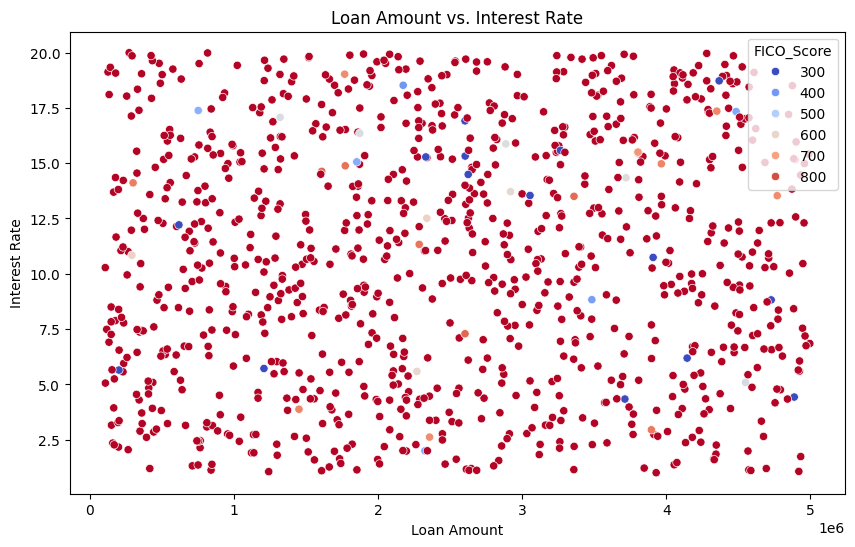

In [21]:
# Scatter plot of Loan Amount vs. Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Loan Amount', y='Interest Rate', data=df, hue='FICO_Score', palette='coolwarm')
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

<ipython-input-22-234056bf6baf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of Loan', y='FICO_Score', data=df, palette='pastel')


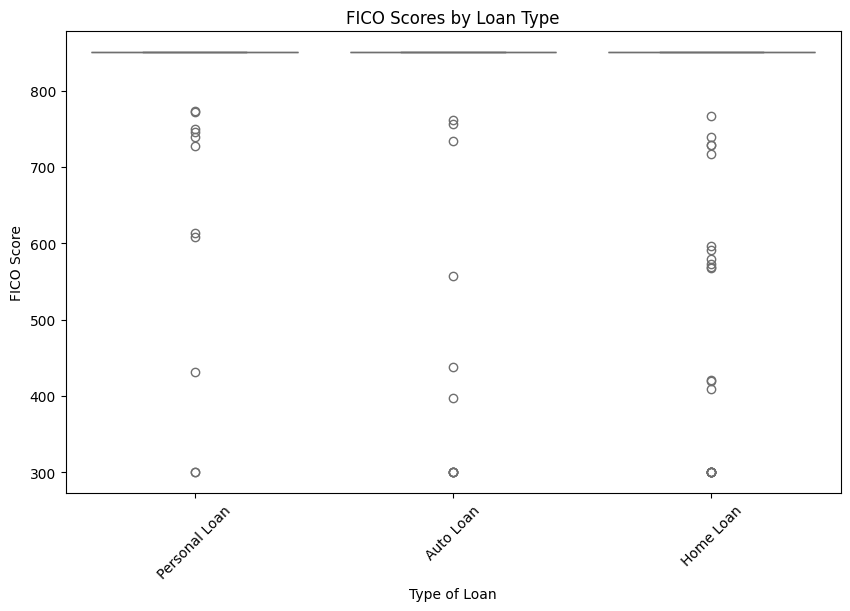

In [22]:
# Plot FICO scores by Loan Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type of Loan', y='FICO_Score', data=df, palette='pastel')
plt.title('FICO Scores by Loan Type')
plt.xlabel('Type of Loan')
plt.ylabel('FICO Score')
plt.xticks(rotation=45)
plt.show()

<ipython-input-23-928406d2b10f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_fico_by_gender.index, y=avg_fico_by_gender.values, palette='viridis')


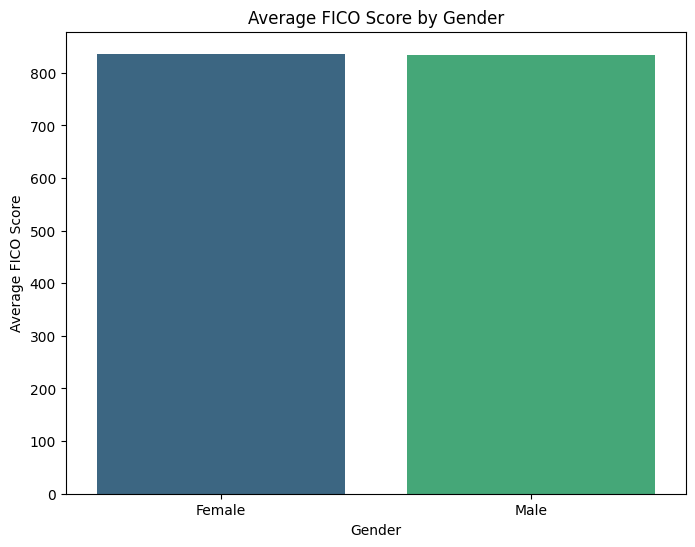

In [23]:
# Calculate average FICO score by gender
avg_fico_by_gender = df.groupby('Gender')['FICO_Score'].mean()

# Plot average FICO scores by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_fico_by_gender.index, y=avg_fico_by_gender.values, palette='viridis')
plt.title('Average FICO Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average FICO Score')
plt.show()

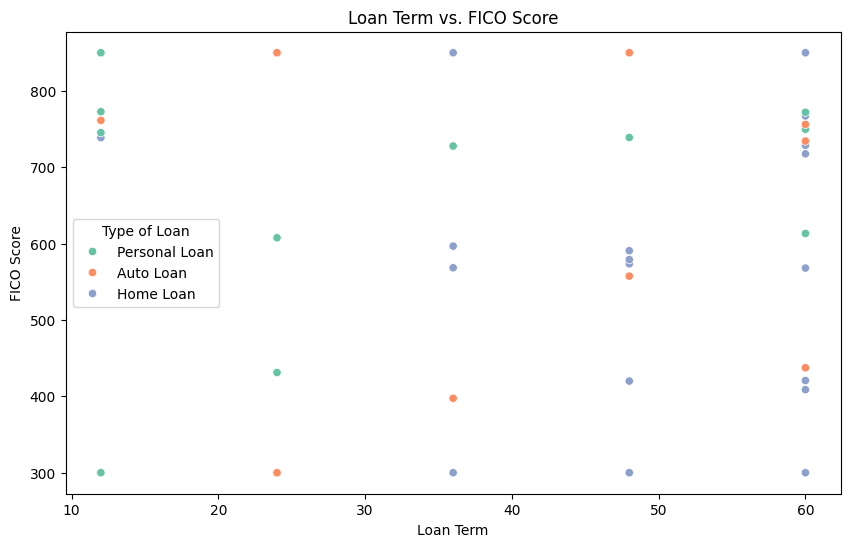

In [24]:
# Scatter plot of Loan Term vs. FICO Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Loan Term', y='FICO_Score', data=df, hue='Type of Loan', palette='Set2')
plt.title('Loan Term vs. FICO Score')
plt.xlabel('Loan Term')
plt.ylabel('FICO Score')
plt.show()

In [25]:
from matplotlib.backends.backend_pdf import PdfPages

# Save all plots to a PDF
with PdfPages('credit_scoring_insights.pdf') as pdf:
    # FICO Scores by Employment Status
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Employment Status', y='FICO_Score', data=df, palette='Set2')
    plt.title('FICO Scores by Employment Status')
    plt.xlabel('Employment Status')
    plt.ylabel('FICO Score')
    pdf.savefig()
    plt.close()

    # Credit Utilization Ratio vs. FICO Score
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Credit Utilization Ratio', y='FICO_Score', data=df, hue='Employment Status', palette='viridis')
    plt.title('Credit Utilization Ratio vs. FICO Score')
    plt.xlabel('Credit Utilization Ratio')
    plt.ylabel('FICO Score')
    pdf.savefig()
    plt.close()

    # Add more plots as needed...

print("Insights saved to 'credit_scoring_insights.pdf'.")

<ipython-input-25-59d4c63c1013>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Employment Status', y='FICO_Score', data=df, palette='Set2')


Insights saved to 'credit_scoring_insights.pdf'.
